In [1]:
from langchain_openai import ChatOpenAI
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [3]:
import xarray as xr

In [4]:
from arraylake import Client

In [5]:
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool, StructuredTool
from langchain_experimental.utilities import PythonREPL
from langchain.prompts import MessagesPlaceholder
from langchain.agents import AgentExecutor, create_tool_calling_agent

In [6]:
import uuid


In [7]:
from loader import load_climate_data, ClimateDataParams

In [8]:
HF_TOKEN = os.environ["HF_TOKEN"]

In [9]:
llm = ChatOpenAI(
    base_url="https://router.huggingface.co/v1",
    api_key=HF_TOKEN,
    model="openai/gpt-oss-20b:fireworks-ai" 
)

In [10]:
download_tool = StructuredTool.from_function(
    func=load_climate_data,
    name="load_climate_data",
    description="A general use function for downloading datasets from various sources on the internet.",
    args_schema=ClimateDataParams
)

In [11]:
tools = [download_tool]

In [12]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a data downloading agent and you should use the load_climate_data to read it."),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

In [13]:
agent = create_tool_calling_agent(
    llm=llm,
    tools=tools,
    prompt=prompt,
)

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [14]:
r = agent_executor.invoke({"input": "load an hour's worth of 2m_temperature data from the dataset at gs://weatherbench2/datasets/era5/1959-2023_01_10-6h-240x121_equiangular_with_poles_conservative.zarr"})



> Entering new AgentExecutor chain...

Invoking: `load_climate_data` with `{'store': 'gs://weatherbench2/datasets/era5/1959-2023_01_10-6h-240x121_equiangular_with_poles_conservative.zarr', 'variable': '2m_temperature', 'time_range': ['1959-01-01T00:00:00', '1959-01-01T00:59:59']}`


Saving to ../../temp/2m_temperature_20250821_225703.nc (estimated size: 0.00 GB)
Actual file size: 0.00 GB
(<xarray.DataArray '2m_temperature' (time: 1, latitude: 121, longitude: 240)> Size: 116kB
[29040 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 968B -90.0 -88.5 -87.0 ... 87.0 88.5 90.0
  * longitude  (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * time       (time) datetime64[ns, UTC] 8B 1959-01-01 00:00:00+00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K, '../../temp/2m_temperature_20250821_225703.nc')Here’s the 2 m temperature for the requested hour:

- **Time**: 1959‑01‑01 00:00 UTC (only one time step pres

In [15]:
import xarray as xr

In [20]:
test_ds = xr.open_dataset("/home/jovyan/temp/2m_temperature_20250821_224705.nc")

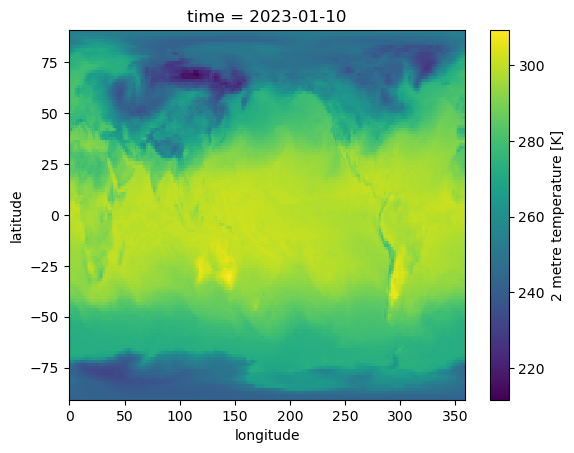

In [22]:
test_ds['2m_temperature'].plot()